In [110]:
### Code written by Sambit Sarkar as a part of the ML+statistics course in DHEP, TIFR

### based on this paper: https://www.sciencedirect.com/science/article/pii/S0370269311010835?via%3Dihub

# Theory

We have already learnt in lectures that the profile likelihood ratio is extremely useful for constructing hypothesis testing parameter. This ratio is simply,
\begin{equation}
\lambda(\mu) = \frac{L(\mu,\hat{\hat{\theta}})}{L(\hat{\mu},\hat{\theta})}\tag{1}
\end{equation}
where $L$ is the likelihood function and $\hat{\hat{\theta}}$ is the conditional maximum likelihood estimator of $\theta$ while $\hat{\theta}$ is the unconditional maximized likelihood estimator. The best test statistic for upper limit can be found using this as,
\begin{equation}
q_\mu = \begin{cases}-2\ln[\lambda(\mu)], & \hat{\mu}\leq\mu\\
0, & \hat{\mu}>\mu\end{cases}\tag{2}
\end{equation}

We shall assume a poisson signal + background so that the likelihood function  with the nuisance parameter becomes,
\begin{equation}
L(\mu,b) = \frac{(\mu s+b)^n}{n!}e^{-(\mu s+b)}\frac{(\tau b)^m}{m!}e^{-\tau b}\tag{3}
\end{equation}
The ML estimators are given below,
\begin{align}
\hat{\mu} &= \frac{n-m/\tau}{s}\tag{4}\\
\hat{b} &= \frac{m}{\tau}\tag{5}\\
\hat{\hat{b}} &= \frac{n+m-(1+\tau)\mu s}{2(1+\tau)}+\left[\frac{(n+m-(1+\tau)\mu s)^2+4(1+\tau)m\mu s}{4(1+\tau)^2}\right]^{1/2}\tag{6}
\end{align}
Next when we talk about the event counts predicted from the standard model taking a scale factor $\tau$ into account for deviations from Poissonian statistics, we should get a mean with standard deviations that we can write as,
\begin{equation}
N_{SM} = \left< N_{SM} \right> \pm \Delta\tag{7}
\end{equation}
If we write this in terms of the Poissonian count we get,
\begin{equation}
N_{SM} = N\tau\pm\sqrt{N}\tau\tag{8}
\end{equation}
which then gives us the raw count with the scaling,
\begin{equation}
N = \left(\frac{\left< N_{SM} \right>}{\Delta}\right)^2\quad,\quad\tau = \frac{N}{\left< N_{SM} \right>}\tag{9}
\end{equation} 
Now here we note that the background is simply the standard model prediction for the expected counts while the signal is the expected count if excited leptons exist thus we establish,
\begin{equation}
s = \left< N_{exp}\right>\quad,\quad b = \left< N_{SM}\right>\tag{10}
\end{equation}
Taking the luminosity and the detector efficiency into account we get the upper limit on cross section,
\begin{equation}
\sigma = \frac{\mu_{cut}N_{exp}}{36\epsilon}\tag{11}
\end{equation}

# Imports

In [111]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson 
from scipy.special import factorial

# Upper Limit Evaluation

### Direct Quantities

In [112]:
Me = np.array([200 , 400 , 600 , 800 , 1000 , 1200 , 1500]) ### Mass hypothesis
Mcut = np.array([180 , 350 , 500 , 500 , 500 , 500 , 500]) ### Low mass cut
Ndata = np.array([0 , 0, 0, 0, 0, 0, 0]) ### number of events observed
NSM = np.array([1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01]) ### bkg events from the Standard Model
Delta = np.array([0.15, 0.07, 0.06, 0.06, 0.06, 0.06, 0.06]) ### uncertainty on the bkg
signaleff = np.array([0.387, 0.446, 0.47, 0.493, 0.509, 0.513, 0.529])
Nexp = np.array([40, 16, 6.4, 2.5, 1.0, 0.4, 0.1])
num = 100000

In [113]:
N = ((NSM/Delta)**2)

tau = (N/NSM).reshape(-1,1,1)
s = Nexp.reshape(-1,1,1)
b = NSM.reshape(-1,1,1)

nobs = Ndata.reshape(-1,1,1)
mobs = (b*tau).round()

In [114]:
nobs[0,0,0]

0

In [115]:
mobs[0,0,0]

44.0

In [116]:
taub

array([[[4.44444444e+01]],

       [[2.04081633e+00]],

       [[2.77777778e-02]],

       [[2.77777778e-02]],

       [[2.77777778e-02]],

       [[2.77777778e-02]],

       [[2.77777778e-02]]])

In [188]:
taub = (tau * b).reshape(-1,1,1)
taub

array([[[4.44444444e+01]],

       [[2.04081633e+00]],

       [[2.77777778e-02]],

       [[2.77777778e-02]],

       [[2.77777778e-02]],

       [[2.77777778e-02]],

       [[2.77777778e-02]]])

In [118]:
taub.shape

(7, 1, 1)

In [119]:
len(taub)

7

In [120]:
tau

array([[[44.44444444]],

       [[20.40816327]],

       [[ 2.77777778]],

       [[ 2.77777778]],

       [[ 2.77777778]],

       [[ 2.77777778]],

       [[ 2.77777778]]])

### Derived Quantities

Axis 0: Corresponding to different M value

Axis 1: Different Poissonian sample

Axis 2: Different mu values

In [121]:
poisson_samples_n = []
poisson_samples_m = []

for i in range(len(Nexp)):
    samples_n = np.random.poisson(lam=Nexp[i], size=num)
    poisson_samples_n.append(samples_n) 

for i in range(len(taub)):
    samples_m = np.random.poisson(lam=taub[i,0,0], size=num)
    poisson_samples_m.append(samples_m) 


poisson_samples_n = np.array(poisson_samples_n)
poisson_samples_m = np.array(poisson_samples_m)


In [122]:
poisson_samples_n.shape

(7, 100000)

In [123]:
poisson_samples_m.shape

(7, 100000)

In [189]:
poisson_samples_m[4]

array([0, 0, 0, ..., 0, 0, 0])

In [190]:
poisson_samples_n[4]

array([1, 1, 0, ..., 3, 0, 3])

In [124]:
tau.shape

(7, 1, 1)

In [178]:


# Likelihood functions
def Likelihood_b(samples, b, m, tau):
    term = (((tau *b)**m)/factorial(m))*np.exp(-(tau * b))
    # print("term: ",term[10:21])
    
    return (np.exp(-b) * (b**samples) / factorial(samples))*term

def Likelihood_sb(samples, s,  b, mu, m, tau):
    N = ((mu * s) + b)
    term = (((tau *b)**m)/factorial(m))*np.exp(-(tau * b))
    return (np.exp(-N) * (N**samples) / factorial(samples))*term

# Log-likelihood ratio
def log_likelihood_ratio(samples, s, b_hat, mu_hat, b_dhat, m, tau):
    print("b: ", b_hat)
    L0_vals = Likelihood_b(samples, b_dhat, m, tau)
    print("L_0 values: ", L0_vals)
    L1_vals = Likelihood_sb(samples, s, b_hat, mu_hat, m, tau)
    print("L_1 values: ", L1_vals)
    
    # Avoid divide-by-zero warning``
    return np.where(L0_vals != 0, -2 * np.log(L0_vals / L1_vals), np.inf)

In [126]:
# lambda_1 = log_likelihood_ratio(poisson_samples_n, )

### Estimators and Test Statistics

In [127]:
# def estimators(mu,s, tau,n=None,m=None):
#     ### get the values of muhat, bhat and bhathat
#     mu_hat = (n - (m/tau)) / s
#     num = (n+m-((1+tau)*mu*s))**2+(4*(1+tau)*m*mu*s)
#     den = 4*((1+tau)**2)
#     b_dhat = ((n+m-((1+tau)*mu*s))/(2*(1+tau)))+((num/den)**(1/2))
#     b_hat = m/tau
#     return mu_hat, b_hat, b_dhat


# def test_statistics(mu,s, tau,n=None,m=None):
#     ### get the distribution of q0
#     mu_hat, b_hat, b_dhat = estimators(mu,s, tau,n,m)
#     print(mu_hat)
#     mu_hat[mu_hat>mu] = 0
#     q = log_likelihood_ratio(n, s, b_hat, mu_hat, b_dhat, m, tau)
#     print(q.shape)
#     print(q)
#     print(mu_hat.shape)
#     q [mu_hat == 0] = 0
#     return q



# def p_value(mu, s,  tau, N_obs, M_obs, n=None,m=None):
#     ### get the p-value of the observed quantity
#     t_obs = test_statistics(mu, s, tau, N_obs, M_obs)
#     print(t_obs)

#     q = test_statistics(mu, s,  tau, n, m)
#     print(q)

#     cross_indices = np.where(q > t_obs)[0]

#     if cross_indices.size > 0:
#         first_cross = cross_indices[0]
#         result = q[first_cross:].sum()

#     return result


In [184]:

def estimators(mu, s, tau, n=None, m=None):
    mu_hat = (n - (m / tau)) / s
    num = (n + m - ((1 + tau) * mu * s)) ** 2 + (4 * (1 + tau) * m * mu * s)
    den = 4 * ((1 + tau) ** 2)
    b_dhat = ((n + m - ((1 + tau) * mu * s)) / (2 * (1 + tau))) + ((num / den) ** 0.5)
    b_hat = m / tau
    return mu_hat, b_hat, b_dhat

def test_statistics(mu, s, tau, n=None, m=None):
    mu_hat, b_hat, b_dhat = estimators(mu, s, tau, n, m)
    print("b: ",b_hat)
    print("mu_hat: ",mu_hat)
    
    # Handle scalar case
    if np.isscalar(mu_hat):
        if mu_hat > mu:
            q = 0
        else:
            q = log_likelihood_ratio(n, s, b_hat, mu_hat, b_dhat, m, tau)
    else:
        mu_hat[mu_hat > mu] = 0
        q = log_likelihood_ratio(n, s, b_hat, mu_hat, b_dhat, m, tau)
        q[mu_hat == 0] = 0

    return q

def p_value(mu, s, tau, N_obs, M_obs, n=None, m=None):
    t_obs = test_statistics(mu, s, tau, N_obs, M_obs)
    print("t_obs: ", t_obs)
    q = test_statistics(mu,s,  tau, n, m)
    print("q: ",q)

    cross_indices = np.where(q > t_obs)[0]
    if cross_indices.size > 0:
        first_cross = cross_indices[0]
        result = q[first_cross:].sum()
    else:
        result = 0.0

    return result


In [185]:

p_val_1 = p_value(0.4, s[1,0,0],tau[2,0,0], nobs[2,0,0], mobs[2,0,0], poisson_samples_n[2], poisson_samples_m[2])

b:  0.0
mu_hat:  0.0
b:  0.0
L_0 values:  1.0
L_1 values:  1.0
t_obs:  -0.0
b:  [0.   0.36 0.   ... 0.   0.   0.  ]
mu_hat:  [0.375  0.54   0.1875 ... 0.5    0.3125 0.3125]
b:  [0.   0.36 0.   ... 0.   0.   0.  ]
L_0 values:  [0.00000000e+000 2.06132201e-010 0.00000000e+000 ... 3.75181353e-128
 0.00000000e+000 0.00000000e+000]
L_1 values:  [1.60623141e-01 7.18321687e-11 2.24041808e-01 ... 0.00000000e+00
 1.75467370e-01 1.75467370e-01]
q:  [inf  0. inf ...  0. inf inf]


/tmp/ipykernel_48467/2408172751.py:22: RuntimeWarning: divide by zero encountered in divide
  return np.where(L0_vals != 0, -2 * np.log(L0_vals / L1_vals), np.inf)
/tmp/ipykernel_48467/2408172751.py:22: RuntimeWarning: invalid value encountered in divide
  return np.where(L0_vals != 0, -2 * np.log(L0_vals / L1_vals), np.inf)
/tmp/ipykernel_48467/2408172751.py:22: RuntimeWarning: divide by zero encountered in log
  return np.where(L0_vals != 0, -2 * np.log(L0_vals / L1_vals), np.inf)


In [130]:
p_val_1

0.0

In [148]:
tau[1,0,0]

20.408163265306122

In [131]:
tau[0,0,0]

44.44444444444445

In [132]:
poisson_samples_n[0]

array([37, 34, 37, ..., 40, 59, 46])

In [133]:
t_1 = test_statistics (0.04, s[0,0,0],tau[0,0,0], n= poisson_samples_n[0], m = poisson_samples_m[0])

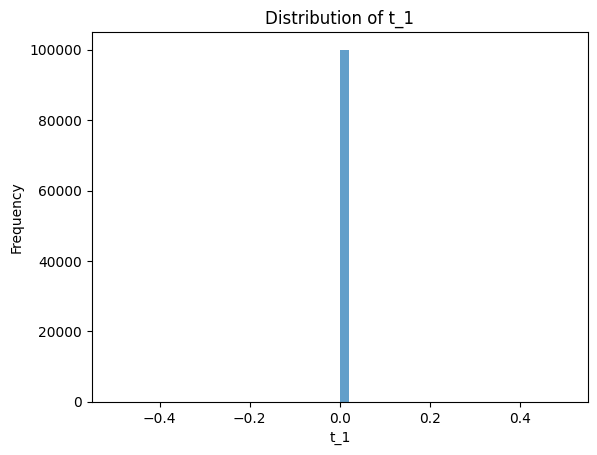

In [134]:
# plot the distribution of t_1
plt.hist(t_1, bins=50, alpha=0.7)
plt.xlabel('t_1')
plt.ylabel('Frequency')
plt.title('Distribution of t_1')
plt.show()


In [135]:
mu_hat_1, b_hat_1, b_dhat_1 = estimators(1, s[0,0,0], tau[1,0,0], n=poisson_samples_n[0], m=poisson_samples_m[0])
mu_hat_1[:10]
b_hat_1[:10]
b_dhat_1[:10]

array([1.65692367, 2.18423541, 2.7746455 , 2.03889548, 2.06506003,
       2.13825115, 2.1556101 , 2.03654808, 2.43472078, 1.96696567])

# Manual Evaluation of Cut on Mu

In [136]:
mu_sample = np.array([np.linspace(0.03,0.04,100),
               np.linspace(0.145,0.155,100),
               np.linspace(0.4,0.5,100),
               np.linspace(1.15,1.25,100),
               np.linspace(2.95,3.05,100),
               np.linspace(7.4,7.5,100),
               np.linspace(29,30,100)])[:,np.newaxis,:]
mu_sample.shape

(7, 1, 100)

In [137]:
mu_sample[1][0]

array([0.145     , 0.14510101, 0.14520202, 0.14530303, 0.14540404,
       0.14550505, 0.14560606, 0.14570707, 0.14580808, 0.14590909,
       0.1460101 , 0.14611111, 0.14621212, 0.14631313, 0.14641414,
       0.14651515, 0.14661616, 0.14671717, 0.14681818, 0.14691919,
       0.1470202 , 0.14712121, 0.14722222, 0.14732323, 0.14742424,
       0.14752525, 0.14762626, 0.14772727, 0.14782828, 0.14792929,
       0.1480303 , 0.14813131, 0.14823232, 0.14833333, 0.14843434,
       0.14853535, 0.14863636, 0.14873737, 0.14883838, 0.14893939,
       0.1490404 , 0.14914141, 0.14924242, 0.14934343, 0.14944444,
       0.14954545, 0.14964646, 0.14974747, 0.14984848, 0.14994949,
       0.15005051, 0.15015152, 0.15025253, 0.15035354, 0.15045455,
       0.15055556, 0.15065657, 0.15075758, 0.15085859, 0.1509596 ,
       0.15106061, 0.15116162, 0.15126263, 0.15136364, 0.15146465,
       0.15156566, 0.15166667, 0.15176768, 0.15186869, 0.1519697 ,
       0.15207071, 0.15217172, 0.15227273, 0.15237374, 0.15247

In [138]:
for i in range(len(Me)):
    for mu in mu_sample[i][0]:
        


IndentationError: expected an indented block (862067503.py, line 3)

# Cross Section Evaluation